[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Introducing JAX
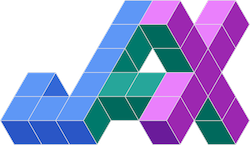

JAX is a combination of Automatic Differentiation and XLA (Accelerated Linear ALgebra). XLA is a compiler developed by Google to work on TPU units. Autograd and XLA are brought together by JAX to accelerate ML research by enabling high-speed numerical computing. JAX's highlights include Python-Numpy code base, ease of Differentiating complex functions, Vectorization, Parallelzation, and Just-In-Time (jit) compilation.

JAX is basically a python library, just like Tensorflow and Pytorch but a bit different, I would not compare the three as is, however this should get you more comfortable around learning JAX. There is another library called FLAX (from Google Research team) which is built on top of it, and you can draw parallels to Keras being built on top of Tensorflow.

JAX Loves Numpy. Its API is very much like Numpy. It work on all accelerators - CPU, GPU, and TPUs.

Like numpy, JAX has arrays too, but two things, one they are called instead Device Arrays and two, they are Immutable. ALso, JAX is not stateful, this would imply that if you are generating random numbers you will have to pass the random state explicitly and not implicitly unlike it happen in Python Numpy. Device Arrays means that these arrays lie on your devices - CPU, GPU, and TPU. These devices are also called accelerators.

JAX has something called Asynchronus Dispatch System in the background. What it does is that it immedaitely delegates a computation task on device arrays to the Accelerator as soon as it is typed in, it doesn't even wait for it to excute. This is tricky as well as very useful feature which we need to keep in mind while programming using JAX. One solution is to use block_until_ready() while assiging an output of a calculation to a variable.

JAX uses XLA to optimize your ML code using cool compiler tricks and the programmer doesn't have to worry about it. When you cast your function as Just-in-time or to say when you jit your functions they at times become order of magnitude faster, thus giving you performance benefits.

Automatic differentiation makes JAX the most exciting library for deep learning practitioners. Derivatives are integral part of back propagation which in turn is integral to the learning process of neural networks. This is done using grad() fnction in JAX.

**Lets get cracking!**

In [3]:
#Imprting Jax numpy and numpy libraries
import jax.numpy as jnp
import numpy as np

#Getting somr essential JAX operations
from jax import jit, vmap, pmap, grad
from jax import random
from jax import device_put

import matplotlib.pyplot as plt


Jax's syntax is similar to numpy.

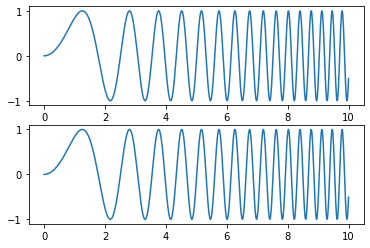

In [ ]:
#Plotting together to compare

fig, ax = plt.subplots(2)

#Using Numpy
x_np = np.linspace(0,10,1000)
y_np = np.sin(x_np**2)
ax[0].plot(x_np, y_np)

#using Jax.numpy -- same functions
x_jnp = jnp.linspace(0,10,1000)
y_jnp = jnp.sin(x_jnp**2)
ax[1].plot(x_jnp, y_jnp)


As I mentioned at the start, JAX arrays are called Device Arrays and are immutable in nature. This is quite different from Numpy's implementation of arrays.

In [ ]:
#Numpy array example - Mutable
x_np = np.arange(10)
print(x_np)
x_np[5]=100
print(x_np)

#Jax Device Arrays are Immutable - Example
x_jnp = jnp.arange(10)
print(x_jnp)
x_jnp[5]=100 #ERROR

[0 1 2 3 4 5 6 7 8 9]
[  0   1   2   3   4 100   6   7   8   9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#Way around immutability - how to modify a jax array and use it afterwards by creating a new jax array
y_jnp = x_jnp.at[5].set(100)
print(x_jnp)
print(y_jnp)

[0 1 2 3 4 5 6 7 8 9]
[  0   1   2   3   4 100   6   7   8   9]


**Random number handling in JAX** - Unlike Numpy, JAX is not stateful.

In [4]:
#Pseudo random number generator
seed = 0
key = random.PRNGKey(seed)  #key is same as state in numpy
x_jnp = random.normal(key,(10,))
x_jnp.shape, x_jnp

((10,), DeviceArray([-0.3721109 ,  0.26423115, -0.18252768, -0.7368197 ,
              -0.44030377, -0.1521442 , -0.67135346, -0.5908641 ,
               0.73168886,  0.5673026 ], dtype=float32))

Cool feature - JAX is **agnostic to accelerators**, that would mean same code can run for CPU, GPU and TPU.

In [ ]:
seed = 0
key = random.PRNGKey(seed) 
x_jnp = random.normal(key,(1000,1000), dtype=jnp.float32)  #Directly pushed to TPU/GPU
x_np = np.random.normal(size=(1000,1000)).astype(np.float32)  #still on CPU
x_jnp, x_np

#lets time the operation and see which one is faster
%timeit jnp.dot(x_jnp,x_jnp.T).block_until_ready()  #Goes to GPU - fastest
%timeit np.dot(x_np,x_np.T)  #HAppens on CPU - SLowest
%timeit jnp.dot(x_np,x_np.T).block_until_ready()  #Goes to GPU - Fast but has an overhead of moving to GPU device

x_np_on_device =device_put(x_np) #pushing numpy array to device
%timeit jnp.dot(x_np_on_device,x_np_on_device.T).block_until_ready()  #Goes to GPU - similar to fastest one


The slowest run took 66.55 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 1.34 ms per loop
10 loops, best of 5: 19.2 ms per loop
100 loops, best of 5: 3.52 ms per loop
1000 loops, best of 5: 1.39 ms per loop


### What block_until_ready() signifies over here? 
We are using block_unitl_ready() method everytime an operation is done on Jax device arrays. This is done because of JAX's "Asynchronous Execution" model. When an operation on arrays is done, Jax does not wait for the operation to complete before returning call to the Python program. Only when we ctually inspect the value of the array, for example, by printing it or by using block_unitl_ready() method which makes the execution stop until the computation is complete. This way Python is able to enqueue arbitrary amount of tasks for the GPU (the accelerator/device) without waiting for the GPU to return with results. This is actually very useful optimization trick that JAX applies, but as you can understand this is also a form of 'gotcha'.

### Why JAX handles random numbers differently than numpy?
JAX enables parallel computing on multiple GPUs which is not really possible with numpy. To do this, to make the code and outputs reproducible Jax has to handle the random numbers in this way.

## Using jit() to speedup operations in JAX
- JAX uses jit() to speedup function excution, while jit in turn uses XLA behind the scenes. XLA is a compiler for linear algebra that can accelerate ML operations with potentially no-code changes. XLA 'fuses' multiple functions/computations together, freeing the GPU memory bandwidth for more operations. Thus it is one of the best way to improve peformance.
- If we have sequence of operations we can use jit() decorator to compile multiple operations together using XLA.  


In [ ]:
#defininig Selu function 
def selu(x, alpha=1.67, lmbda=1.05):
  return lmbda * jnp.where(x>0, x, alpha*jnp.exp(x)-alpha)

x = random.normal(key,(1000000,))

#non-jit version
%timeit selu(x).block_until_ready()

#jit-compile version
selu_jit = jit(selu)
%timeit selu_jit(x).block_until_ready()  #much much faster - in microseconds

The slowest run took 272.55 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 1.75 ms per loop
The slowest run took 925.87 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 161 µs per loop


### Understanding grad()
In Jax, you can compute gradients automatically using grad() function. This is similar to backward() method in pytorch.

In [ ]:
#logistic sum function
def sum_logistics(x):
  return jnp.sum(1.0/(1.0+jnp.exp(-x)))

x = jnp.arange(3.)
print(x)

#taking gradient or differentiating
derivatives_fn = grad(sum_logistics)
print(derivatives_fn(x))

[0. 1. 2.]
[0.25       0.19661194 0.10499357]


In [ ]:
#another grad() example with two variables this time - x, y
x=1.
y=2.

#Second order polynomial (x+y)^2
f = lambda x,y:x**2 +2*x*y**2+ y**2 

#differentiation with respect to x -- 2x +2y
dfdx = grad(f)  #or argnums=0 will do the same
print("Differentiation wrt x",f(x,y), dfdx(x,y))
#differentiation with respect to y -- 4xy +2y
dfdx = grad(f, argnums=1)
print("Differentiation wrt y",f(x,y), dfdx(x,y))


Differentiation wrt x 13.0 10.0
Differentiation wrt y 13.0 12.0


### Understanding Auto-Vectorization with vmap()
- vmap() - the vectorization map. It is used ro map a function to an array or a vector. When used with jit(), it acts as fast as adding a batch dimension to the data. 
- This way you don't have to write up a different function altogether to operate between single value and a batch.

In [10]:
#Example- showing the power of vmap()
mat = random.normal(key,(150,100))  #consider it as weights of nodes in a NN
batched_x = random.normal(key,(10,100))  #consider it as a batch of 10 images which are 10*10 pixels and are flattened 

#Applying matrix across the whole 
def apply_matrix(x):
  return jnp.dot(mat,x) #will work for one image but not for a batch 

#Naive approach to scale the mapping up is applying a for look to your operations
def batching_naively_apply_matrix(batched_x):
  return jnp.stack([apply_matrix(x) for x in batched_x])

#lets time naive approach here-
%timeit batching_naively_apply_matrix(batched_x).block_until_ready()

#lets try batching using jnp.dot operator approach; still bit of manual work-
@jit
def batched_apply_matrix(batched_x):
  return jnp.dot(batched_x, mat.T)  #makes sense because of transpose- (10,100)*(100,150)

#timing second approach
%timeit batched_apply_matrix(batched_x).block_until_ready()  #still faster then for looping

#vmap approach - Dont have to rewrite the code - using the function defined on using single point
@jit
def vmap_batched_apply_matrix(batched_x):
  return vmap(apply_matrix)(batched_x)

#timing the vmap apprach as well
%timeit vmap_batched_apply_matrix(batched_x)  #faster and easier way

100 loops, best of 5: 3.22 ms per loop
The slowest run took 276.57 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 51.2 µs per loop
The slowest run took 1392.62 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 53.7 µs per loop


### JAX's structure 
- Jax has Numpy as its highet layer of abstraction or high level of API, followed by LAX which is mid-level API, and then at the lowest level it is XLA which is a compiler for accelerators.
- LAX is stricter but gives you richer experience 
- LAX allows you to interact with XLA. All Jax operations are implemented in terms of fundamental XLA- the Accelerated Linear Algebra compiler's operations. Understand it this way that LAX is stricter in terms of usage, but often more powerful then jax.numpy operations, when it comes to opearte on multi-dimensional arrays.  

### Just In Time or JIT :
- By default JAX executes operations one at a time, in a sequence.
- Using JIT compilation *decorator*, this sequence of operations can be optimized together and run at once.
-  Not all JAX code can be JIT compiled, there are caveats.

Jit functions are faster, lets see this using an example below:

In [5]:
def norm(x):
  a=x-x.mean(0)
  return a/x.std(0)

#creating a just in time compiled function using jax.jit
norm_compiled = jit(norm)

X = jnp.array(np.random.rand(10000,10))
np.allclose(norm(X),norm_compiled(X), atol=1E-6)  #comparing the values returned by two fucntions - which is exactly same so output will be True

# Now comparing run time
%timeit norm(X).block_until_ready()
%timeit norm_compiled(X).block_until_ready() #much faster


1000 loops, best of 5: 317 µs per loop
The slowest run took 5.18 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 67.9 µs per loop


### JIT's limitations or caveats
- It requires all arrays to have static shapes. What that means is that some JAX operations would become incompatible with Jit. For example, if an array whose shape is not known at compile time will throi error on doing jit().

### What is happening behind JIT
- JIT performs a *tracing* of functions which helps it save on compile time during multiple calls.
- Tracing works by understanding the effect of a function on on the shape and datatype of variables.

See below example -


In [5]:
@jit
def f(x, y):
  #Adding print statements inside a function definition
  print("Running f():")
  print(f"  x = {x}")
  print(f"  y = {y}")
  result = jnp.dot(x + 1, y + 1)
  print(f"  result = {result}")
  return result

x = np.random.randn(3, 4) #calling with one input
y = np.random.randn(4) #calling with another input
f(x, y) #calling the function

Running f():
  x = Traced<ShapedArray(float32[3,4])>with<DynamicJaxprTrace(level=0/1)>
  y = Traced<ShapedArray(float32[4])>with<DynamicJaxprTrace(level=0/1)>
  result = Traced<ShapedArray(float32[3])>with<DynamicJaxprTrace(level=0/1)>


DeviceArray([ 4.2776265, 11.992647 , 11.153131 ], dtype=float32)

**When I will call the same function with matching inputs (shape, type), no compilation step will take place. Nothing gets printed, as the result is computed directly from where it is compiled in XLA rathn getting recompiled in Python.**

While working with JIT we need to keep in mind that JAX creates these *Tracer objects* which have the information on shap and type of value of its arguments, and not theactula values.

In [6]:
x2 = np.random.randn(3, 4) #calling with one input
y2 = np.random.randn(4) #calling with another input
f(x2, y2) #calling the function

DeviceArray([ 3.3866596, -0.4092772,  3.8173635], dtype=float32)



##### As a conclusion on this first article introducing JAX, I introduced the basics of JAX. We talked briefly about its key features like grad(), vmap() and jit(). Later we learnt that there are layers underneath JAX Numpy, namely LAX and XLA. We dived a bit more in how Jit() works behind the scenes. In further articles we will learn about the most importnat datastructure in Jax called PyTrees, we will start using high-level language called FLAX, and then lastly we might implement simple Neural Networks in JAX/FLAX and later on even a complex architectures like RESNET. I would suggest to keep in mind the following important chracteristics/caveats while we work with the language in future -

*   JAX is designed to work only for pure functions. Pure functions would mean that values are passed only through function arguments and results are output only using return statement. Also, a pure function will always return the same value when invoked with same set of inputs. 
          - Note that high level language or wrappers like HAiku and FLAX are built upon this property.

*   We can't update the device arrays **in-place** rather we have to use the *.at[index].set(value)* statement to do that.

*   We can still do almost all the numpy operations using jax.numpy

*   Since JAX is accelerator agnostic, it doesn't throw an exception and there are certain non-error behaviours that you see in several cases which is just to avoid throwing an error and continue when moving from once type of accelerator to another (e.g. GPU to CPU to TPU *etc.*). This is a smiliar behaviour to how in some libraries they won't throw you an error when coming across NaNs and just handle it internally.

*   For the sake of performance, JAX is designed to operate on array inputs only. When you pass a python list object to Numpy you will not encounter any error as Numpy handles the conversion to arrays on its own end. Where as in case of Jax.Numpy, it throws back a TypeeError asking for arrays or scalar values instead. This is one of the examples to understand why **JAX is more useful for Research** and not industry applications as its primary objective is to show high performance on large datasets and big models and not ease of usability. Keep this in mind in future while thinking of JAX use-cases. 

*   JAX handles random numbers very differently then numpy. It has a stateful pseudo random number generator that every time you generate random numbers using a fixed seed value, **you will get same random numbers**. This is unlike Numpy, in which every run would give you totally random numbers. This again is a feature added to improve performance and staying compatible while moving from one device to another, or to say to implement **code reproducibility**. Note that if you do need a use-case in which you want different random number every time, one solution is to use explicit split command. I will probably come across this use-case in later articles.

*   Lastly, JAX enforces single precision values. For example, it will convert float64 to float32. There are simple ways around this default behavious. 








